In this notebook, i convert .mat file in python readble file .csv.

I preprocess **only** 0 Load condition data

Dataset site: https://engineering.case.edu/bearingdatacenter/download-data-file

# Load .mat vibration data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Get the file path to the directory that contains the file you want to read.
file_path = '/content/drive/MyDrive/TESI/Data_raw/0_Load'

# Get a list of files in the directory.
files = os.listdir(file_path)

complete_path_list = []
file_name_list = []

# Loop over the list of files and print the name of each file.
for file in files:
  name = os.path.join(file_path,file)
  complete_path_list.append(name)
  file_name_list.append(file[:-4])

print(complete_path_list)
print(file_name_list)

['/content/drive/MyDrive/TESI/Data_raw/0_Load/IR007_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/IR014_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/IR021_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/B007_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR007-6_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR007-3_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR007-12_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/B014_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR014-6_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/B021_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR021-6_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR021-3_0.mat', '/content/drive/MyDrive/TESI/Data_raw/0_Load/OR021-12_0.mat']
['IR007_0', 'IR014_0', 'IR021_0', 'B007_0', 'OR007-6_0', 'OR007-3_0', 'OR007-12_0', 'B014_0', 'OR014-6_0', 'B021_0', 'OR021-6_0', 'OR021-3_0', 'OR021-12_0']


# Test one file .mat


In [ ]:
# Example read file .mat

path_ex = r'/content/drive/MyDrive/TESI/Data_raw/0_Load/IR007_0.mat'

mat = scipy.io.loadmat(path_ex)

mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:48 2000'), ('__version__', '1.0'), ('__globals__', []), ('X109_DE_time', array([[ 0.010016  ],
       [-0.023788  ],
       [-0.00792933],
       ...,
       [-0.085136  ],
       [-0.05800933],
       [ 0.00542533]])), ('X109_FE_time', array([[-0.35757879],
       [-0.24455101],
       [-0.1870096 ],
       ...,
       [-1.17137879],
       [-1.11630343],
       [-0.98930131]])), ('X109RPM', array([[1796]], dtype=uint16))])

mat is a dict variable.

There are 2 array of value in the dict, under the key:

*   DE = drive end data accelerometer data
*   FE = fan end data accelerometer data





In [ ]:
key_list = list(mat.keys())
key_target = key_list[3]

print(key_list)
print(key_target)

['__header__', '__version__', '__globals__', 'X109_DE_time', 'X109_FE_time', 'X109RPM']
X109_DE_time


In [ ]:
DE_data = mat.get(key_target)

DE_data

array([[ 0.010016  ],
       [-0.023788  ],
       [-0.00792933],
       ...,
       [-0.085136  ],
       [-0.05800933],
       [ 0.00542533]])

In [ ]:
print (file, type(file), file[:-4])

OR021-12_0.mat <class 'str'> OR021-12_0


In [ ]:
# Create an array for labeling the value
fault = np.full((len(DE_data), 1), file_name_list[-1])

fault

array([['OR021-12_0'],
       ['OR021-12_0'],
       ['OR021-12_0'],
       ...,
       ['OR021-12_0'],
       ['OR021-12_0'],
       ['OR021-12_0']], dtype='<U10')

In [ ]:
# Create a table
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

df_temp

,DE_data,fault
0,0.010016,OR021-12_0
1,-0.023788,OR021-12_0
2,-0.007929,OR021-12_0
3,0.078876,OR021-12_0
4,0.202824,OR021-12_0
...,...,...
243933,-0.094317,OR021-12_0
243934,-0.104751,OR021-12_0
243935,-0.085136,OR021-12_0
243936,-0.058009,OR021-12_0


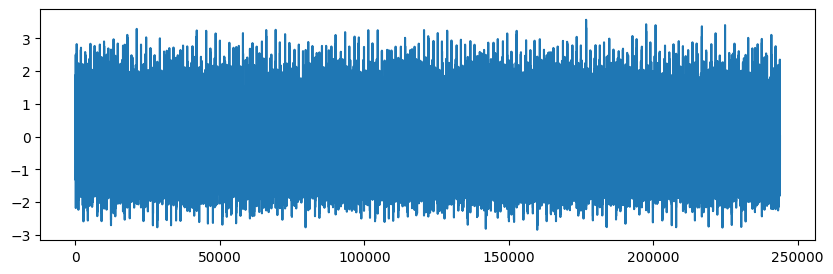

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

duration = number of samples / sampling rate

duration = 243938 / 48000

duration = 5.082041666666667 seconds

# Create DataFrame with all data and save it in .csv format

In [ ]:
# Create a DataFrame empty

df=pd.DataFrame(columns=['DE_data','fault'])

Apply previous methods for all .mat file

In [ ]:
i = 0

for path in complete_path_list:

  mat = scipy.io.loadmat(path)

  key_list = list(mat.keys())
  key_target = key_list[3]

  DE_data = mat.get(key_target)
  fault = np.full((len(DE_data), 1), file_name_list[i])

  df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

  df = pd.concat([df,df_temp],axis=0)
  print(df['fault'].unique())

  i = i+1

['IR007_0']
['IR007_0' 'IR014_0']
['IR007_0' 'IR014_0' 'IR021_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0' 'B014_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0' 'B014_0' 'OR014-6_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0' 'B014_0' 'OR014-6_0' 'B021_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0' 'B014_0' 'OR014-6_0' 'B021_0' 'OR021-6_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0' 'B014_0' 'OR014-6_0' 'B021_0' 'OR021-6_0' 'OR021-3_0']
['IR007_0' 'IR014_0' 'IR021_0' 'B007_0' 'OR007-6_0' 'OR007-3_0'
 'OR007-12_0' 'B014_0' 'OR014-6_0' 'B021_0' 'OR021-6_0' 'OR021-3_0'
 'OR021-12_0'

In [ ]:
# Create a csv with all data

df.to_csv('all_faults_0_load.csv',index=False)

# Check .csv data and show it

In [ ]:
df = pd.read_csv('all_faults_0_load.csv')

In [ ]:
# Check reading and show data

df

,DE_data,fault
0,0.010016,IR007_0
1,-0.023788,IR007_0
2,-0.007929,IR007_0
3,0.078876,IR007_0
4,0.202824,IR007_0
...,...,...
2538686,0.200320,OR021-12_0
2538687,0.137720,OR021-12_0
2538688,0.071781,OR021-12_0
2538689,0.013355,OR021-12_0


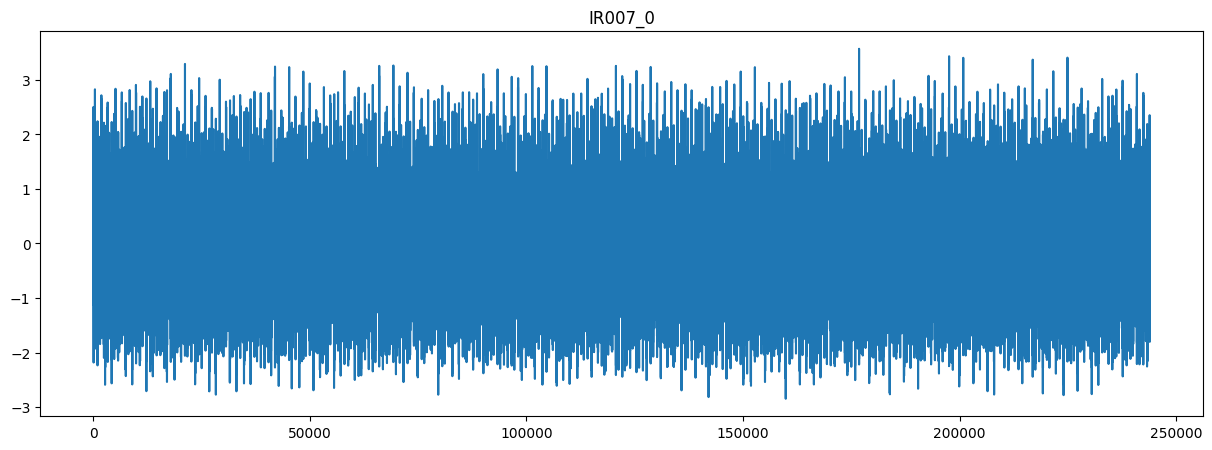

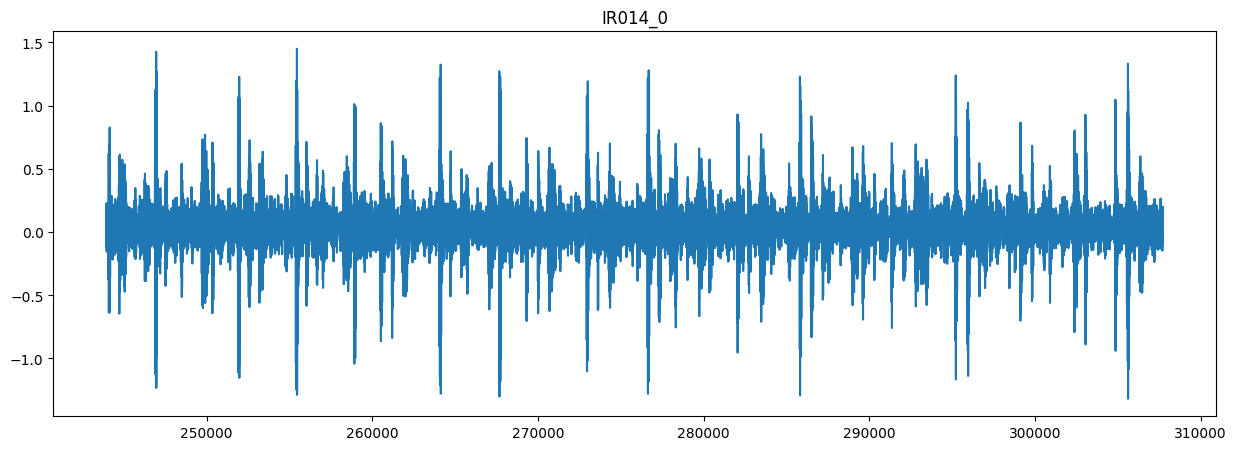

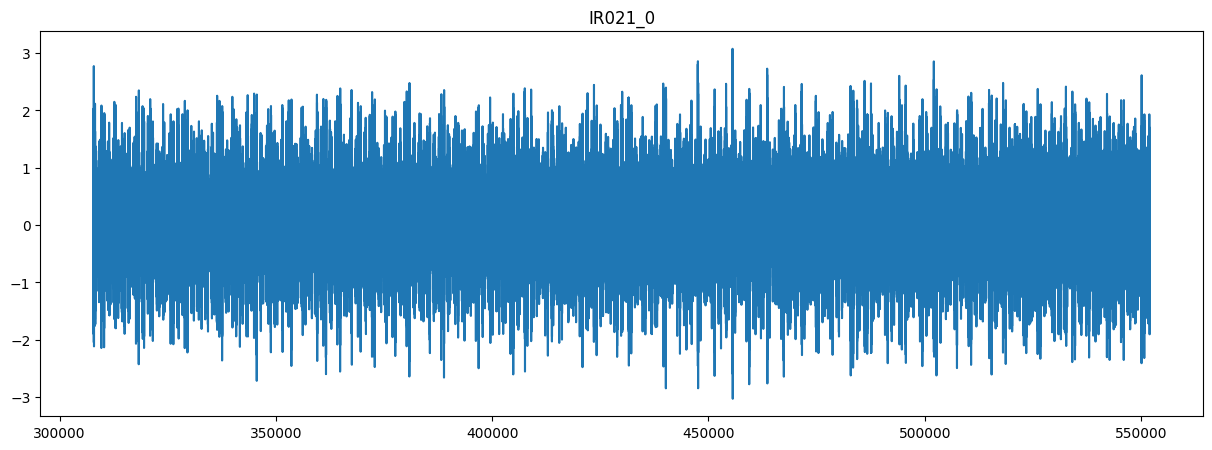

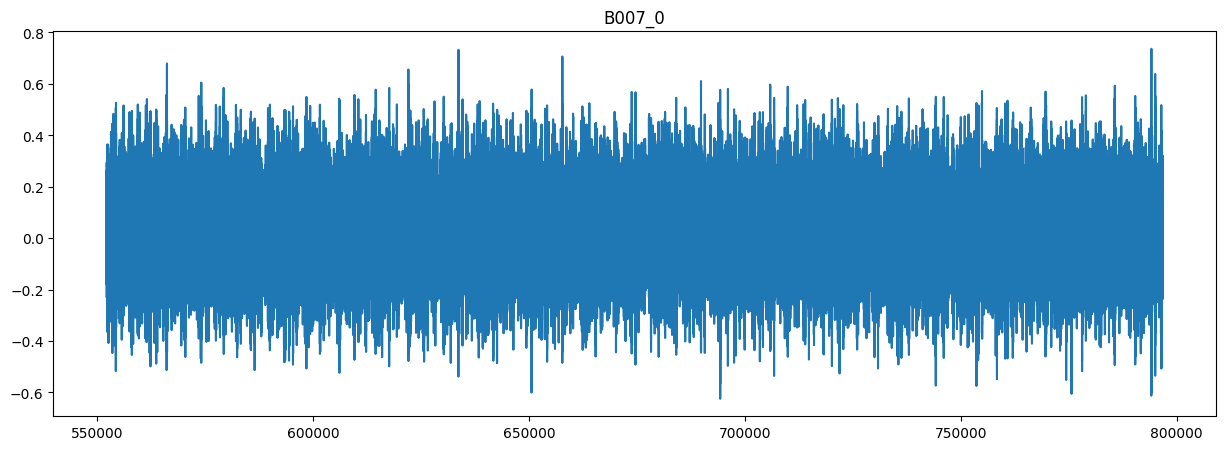

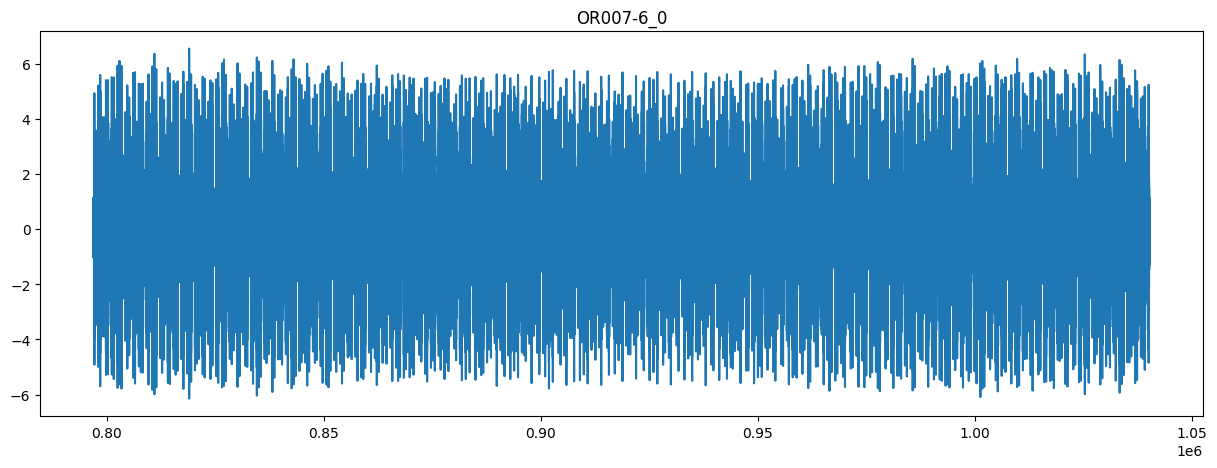

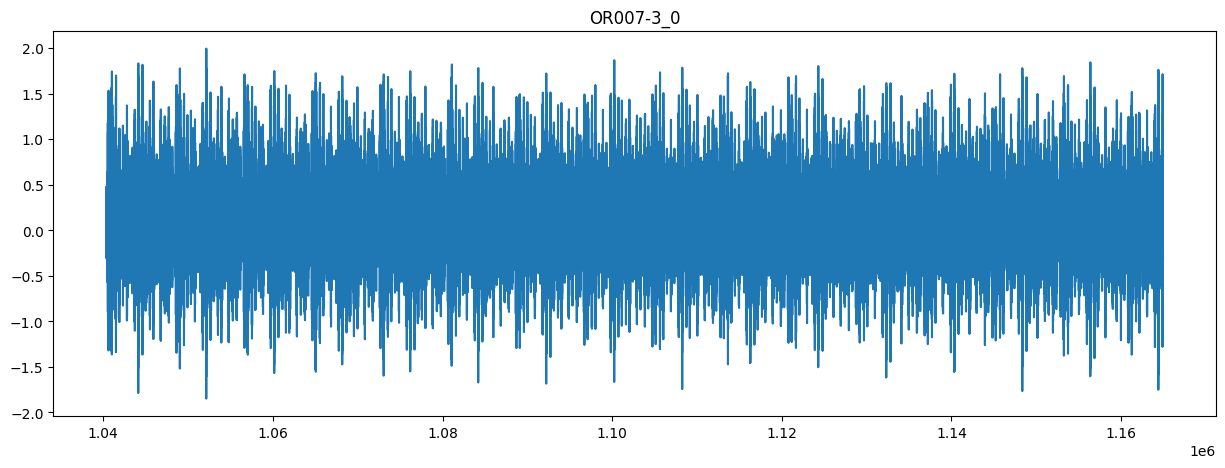

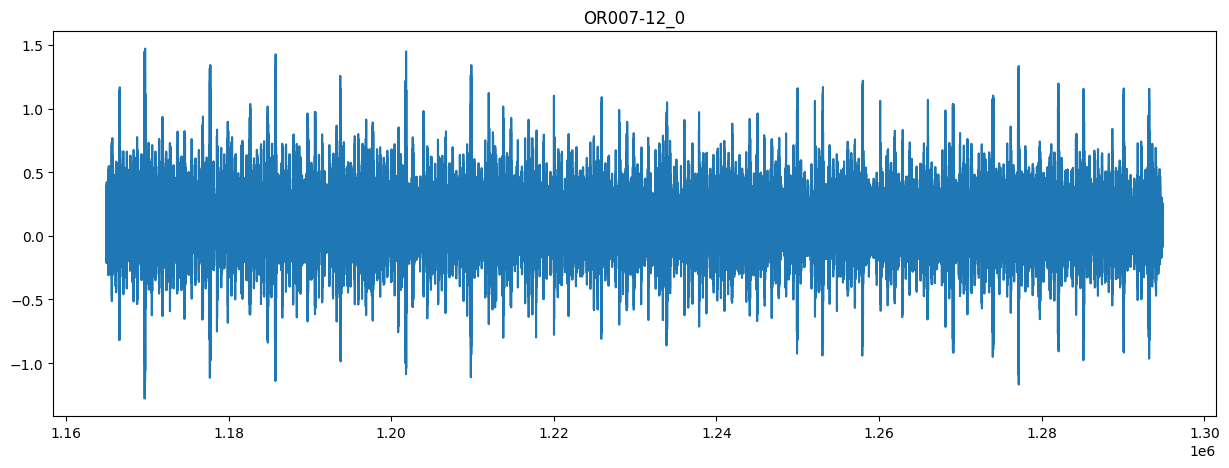

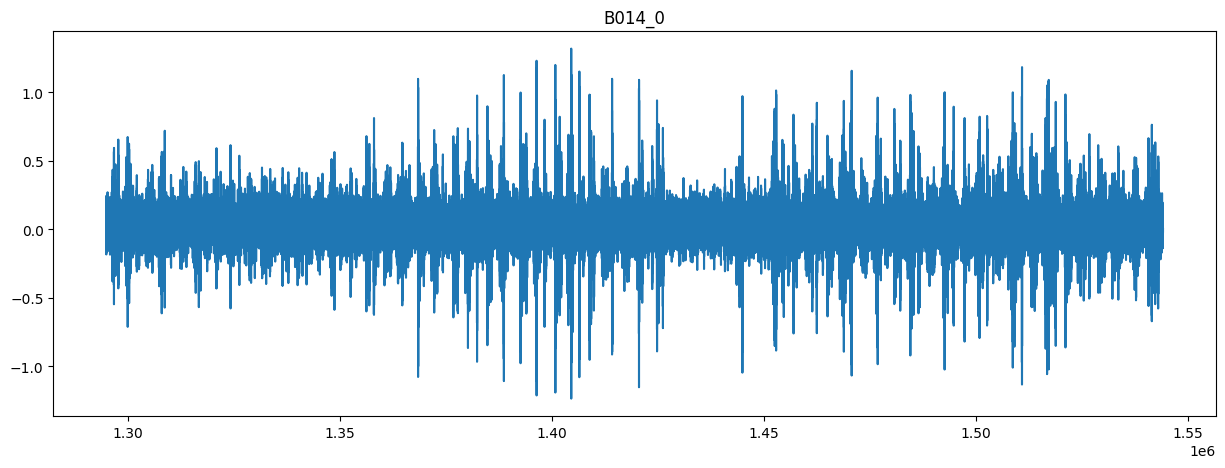

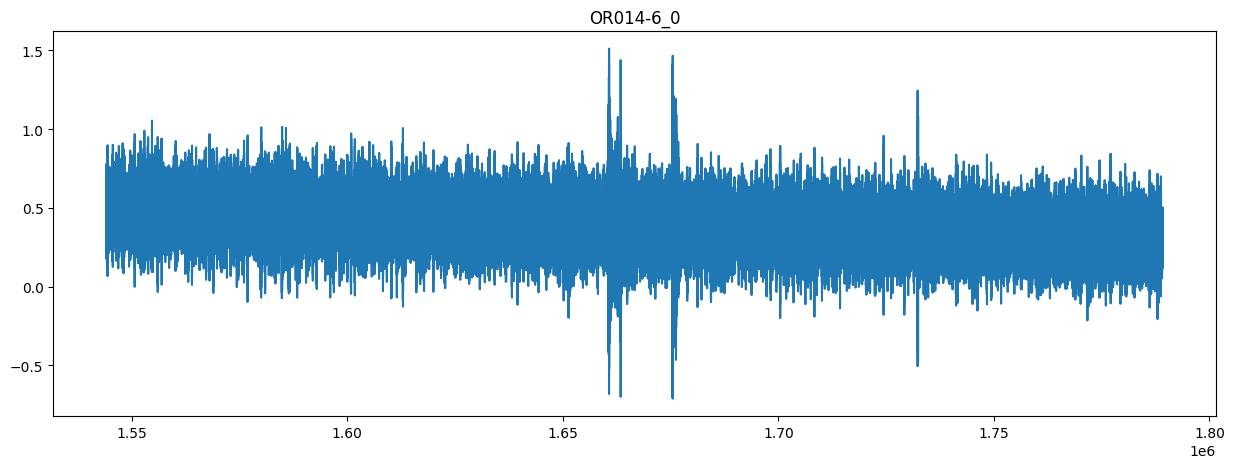

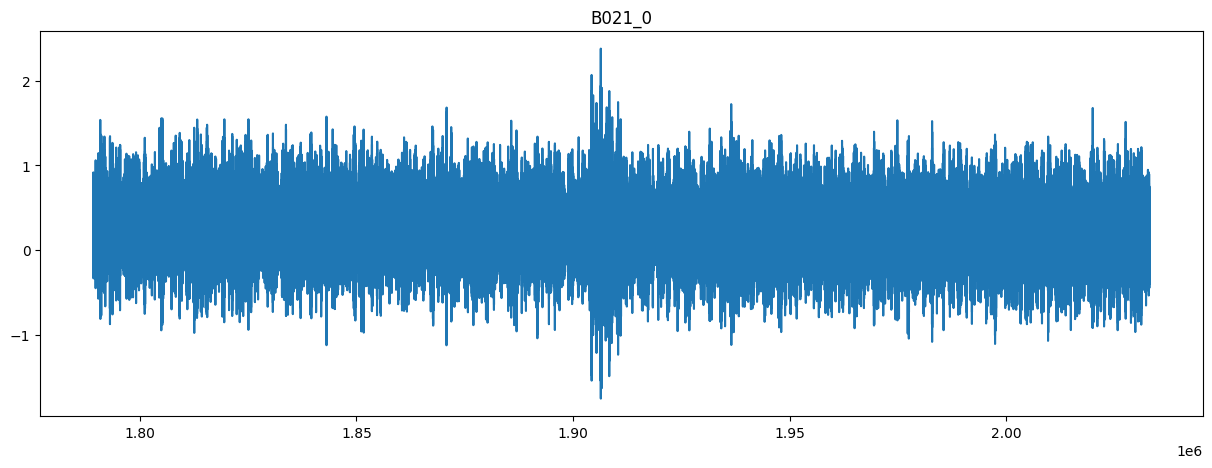

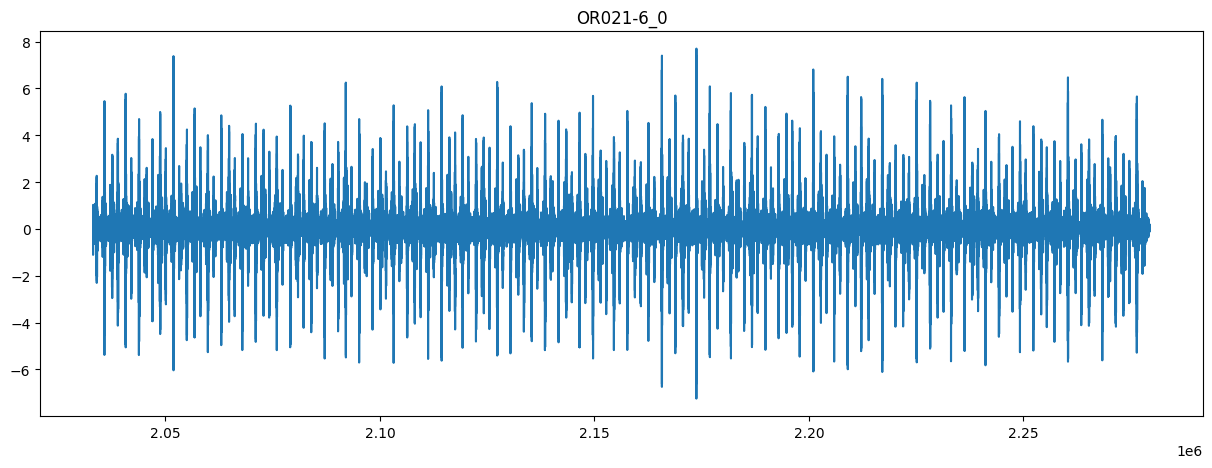

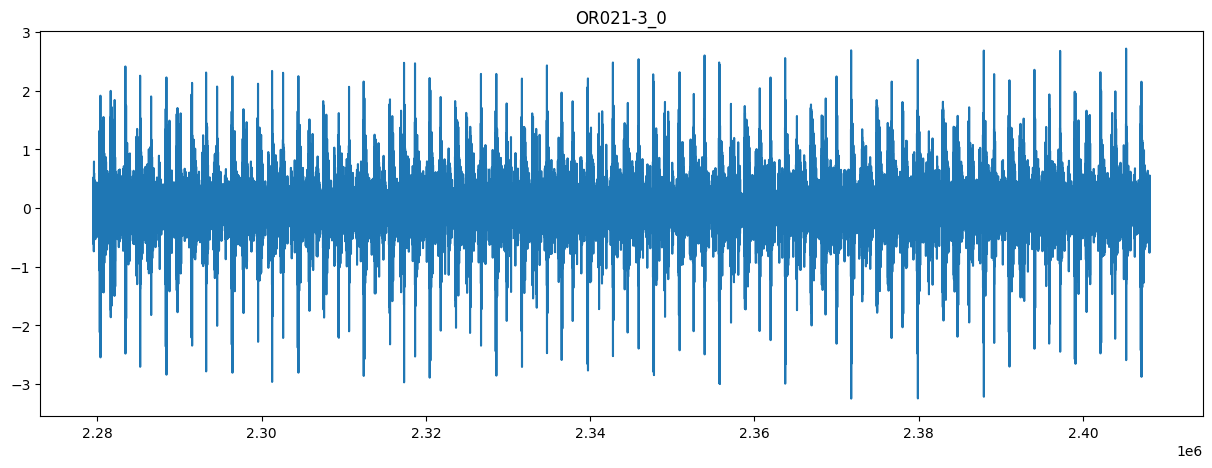

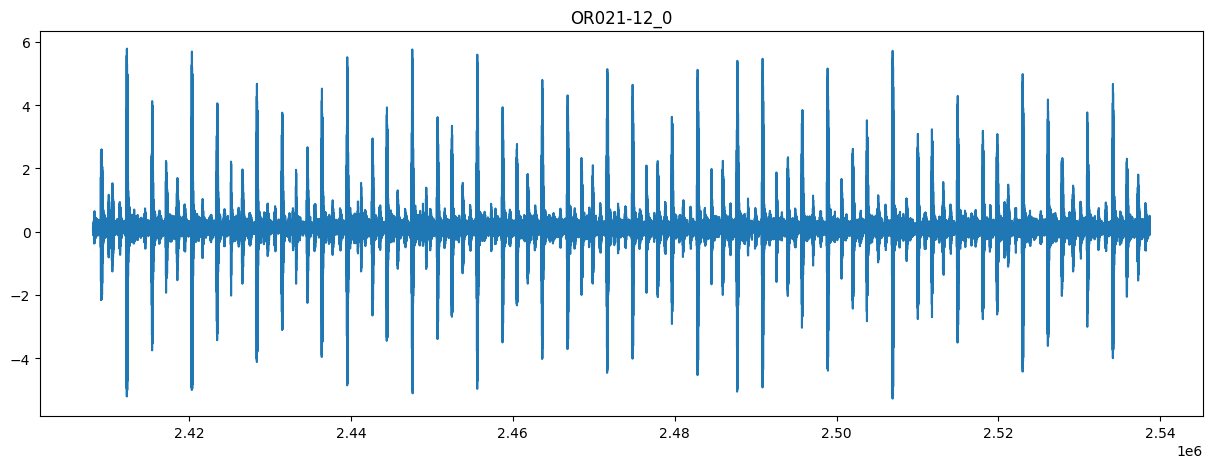

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(15,5))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [ ]:
# Analyse set of points

faults = df['fault'].unique()
for  f in faults:
    u=len(df[df['fault']==f].iloc[:,0])
    print(f'{f} has {u} points')

IR007_0 has 243938 points
IR014_0 has 63788 points
IR021_0 has 244339 points
B007_0 has 244739 points
OR007-6_0 has 243538 points
OR007-3_0 has 124602 points
OR007-12_0 has 129969 points
B014_0 has 249146 points
OR014-6_0 has 245140 points
B021_0 has 243938 points
OR021-6_0 has 246342 points
OR021-3_0 has 128663 points
OR021-12_0 has 130549 points
